In [81]:
from PIL import Image
import os

from keras.src.backend import shape

folder_pizza = "/Users/benjaminbrooke/PycharmProjects/Python_PyTroch/PyTorch for Deep Learning Bootcamp - Udemy/Section 6 - PyTorch Customer Datasets/pizza_steak_sushi/test/pizza"
files = os.listdir(folder_pizza)

filepath = os.path.join(folder_pizza, files[0])

img = Image.open(filepath)



folder_steak = "/Users/benjaminbrooke/PycharmProjects/Python_PyTroch/PyTorch for Deep Learning Bootcamp - Udemy/Section 6 - PyTorch Customer Datasets/pizza_steak_sushi/test/steak"
files = os.listdir(folder_steak)

filepath = os.path.join(folder_steak, files[0])

img = Image.open(filepath)


folder_sushi = "/Users/benjaminbrooke/PycharmProjects/Python_PyTroch/PyTorch for Deep Learning Bootcamp - Udemy/Section 6 - PyTorch Customer Datasets/pizza_steak_sushi/test/sushi"
files = os.listdir(folder_sushi)

filepath = os.path.join(folder_sushi, files[0])

img = Image.open(filepath)

In [95]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

train_transform = transforms.Compose([transforms.Resize((224,224)),transforms.ToTensor()])
test_transform = transforms.Compose([transforms.Resize((224,224)),transforms.ToTensor()])



train_dataset = datasets.ImageFolder("/Users/benjaminbrooke/PycharmProjects/Python_PyTroch/PyTorch for Deep Learning Bootcamp - Udemy/Section 6 - PyTorch Customer Datasets/pizza_steak_sushi/train",train_transform)

test_dataset = datasets.ImageFolder("/Users/benjaminbrooke/PycharmProjects/Python_PyTroch/PyTorch for Deep Learning Bootcamp - Udemy/Section 6 - PyTorch Customer Datasets/pizza_steak_sushi/test",test_transform)


train_loader = DataLoader(train_dataset, batch_size=2,shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1,shuffle=True)

In [83]:
import torch
from torch import nn


class ImageModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.cov_layer_one = nn.Conv2d(in_channels=3,out_channels=124,kernel_size=10,stride=1,padding=1)
        self.activation_one = nn.ReLU()
        self.cov_layer_two = nn.Conv2d(in_channels=124,out_channels=62,kernel_size=5,stride=1,padding=1)
        self.activation_two = nn.ReLU()

        self.pool = nn.AdaptiveAvgPool2d((24, 24))

        self.flat = nn.Flatten()

        self.linear_layer_one = nn.Linear(in_features=62*24*24,out_features=32)
        self.activation_three = nn.ReLU()
        self.linear_layer_two = nn.Linear(in_features=32,out_features=3)

    def forward(self,x):
        return self.linear_layer_two(self.activation_three(self.linear_layer_one(self.flat(self.pool(self.activation_two(self.cov_layer_two(self.activation_one(self.cov_layer_one(x)))))))))


In [84]:
model_0 = ImageModel()

In [85]:
loss_fn = nn.CrossEntropyLoss()

In [86]:
optimizer = torch.optim.Adam(model_0.parameters(),lr = 0.1)

In [87]:
epoch = 1
i = 0
x_point = []
y_loss = []

for epoch in range(epoch):

    for X_train_batch, y_train_batch in train_loader:

        y_pred = model_0(X_train_batch)

        loss = loss_fn(y_pred,y_train_batch)

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        model_0.eval()

        x_point.append(i)
        y_loss.append(loss.item())

        i = i + 1

        if epoch % 1 == 0:
            print(f'Epoch {epoch}, Loss: {loss.item()}')

Epoch 0, Loss: 1.1191530227661133
Epoch 0, Loss: 42689.7109375
Epoch 0, Loss: 245460.203125
Epoch 0, Loss: 28387.16796875
Epoch 0, Loss: 3344.039794921875
Epoch 0, Loss: 0.0
Epoch 0, Loss: 7094.56591796875
Epoch 0, Loss: 164.22862243652344
Epoch 0, Loss: 55.92744445800781
Epoch 0, Loss: 1363.240234375
Epoch 0, Loss: 1444.519287109375
Epoch 0, Loss: 0.0029386826790869236
Epoch 0, Loss: 1.6693835258483887
Epoch 0, Loss: 0.4292476773262024
Epoch 0, Loss: 27.719669342041016
Epoch 0, Loss: 1.0361818075180054
Epoch 0, Loss: 379.861572265625
Epoch 0, Loss: 1.519126534461975
Epoch 0, Loss: 1.0653252601623535
Epoch 0, Loss: 1.0537720918655396
Epoch 0, Loss: 1.5070931911468506
Epoch 0, Loss: 1.541356086730957
Epoch 0, Loss: 1.0622003078460693
Epoch 0, Loss: 1.4130772352218628
Epoch 0, Loss: 1.371675729751587
Epoch 0, Loss: 1.269263744354248
Epoch 0, Loss: 0.9977932572364807
Epoch 0, Loss: 1.2371981143951416
Epoch 0, Loss: 1.149562120437622
Epoch 0, Loss: 0.9967440962791443
Epoch 0, Loss: 1.19403

In [88]:
import matplotlib.pyplot as plt

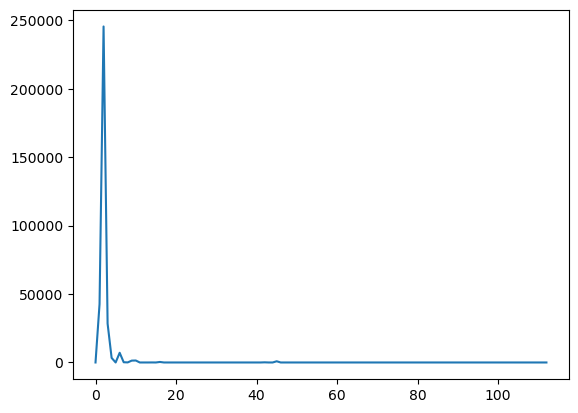

In [89]:
plt.plot(x_point,y_loss)

In [115]:
model_0.eval()

for x_eval, y_eval in test_loader:

    y_logits = model_0(x_eval)

    y_prob = torch.softmax(y_logits,dim=1)

    _, y_pred = torch.max(y_prob,dim = 1)

    one_hot = torch.nn.functional.one_hot(y_pred, num_classes=3)

    print(f"Probabilities: {y_prob.tolist()}, One hot:{one_hot},  Predictions {y_pred}, Index of list True: {y_eval.item()}")


Probabilities: [[0.3700738847255707, 0.3110221326351166, 0.3189040422439575]], One hot:tensor([[1, 0, 0]]),  Predictions tensor([0]), Index of list True: 0
Probabilities: [[0.3700738847255707, 0.3110221326351166, 0.3189040422439575]], One hot:tensor([[1, 0, 0]]),  Predictions tensor([0]), Index of list True: 2
Probabilities: [[0.3700738847255707, 0.3110221326351166, 0.3189040422439575]], One hot:tensor([[1, 0, 0]]),  Predictions tensor([0]), Index of list True: 1
Probabilities: [[0.3700738847255707, 0.3110221326351166, 0.3189040422439575]], One hot:tensor([[1, 0, 0]]),  Predictions tensor([0]), Index of list True: 2
Probabilities: [[0.3700738847255707, 0.3110221326351166, 0.3189040422439575]], One hot:tensor([[1, 0, 0]]),  Predictions tensor([0]), Index of list True: 2
Probabilities: [[0.3700738847255707, 0.3110221326351166, 0.3189040422439575]], One hot:tensor([[1, 0, 0]]),  Predictions tensor([0]), Index of list True: 0
Probabilities: [[0.3700738847255707, 0.3110221326351166, 0.31890